In [1]:
import pandas as pd

In [3]:
df_male = pd.read_csv('he_sentiment.csv')

In [4]:
df_male.head()

,Unnamed: 0,index,song,year,artist,genre,lyrics,score_esn_anger,score_esn_sad,score_esn_joy,score_esn_fear,score_esn_disgust,score_hi_neg,score_hi_pos,score_swn_pos,score_swn_neg,score_sn_sensitivity,score_sn_pleasantness
0,0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu...",0,0,0,0,0,-22,39,15,13,0,1
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see...",0,0,0,0,0,0,0,0,0,0,0
2,2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...,0,0,0,0,0,0,0,0,0,0,0
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...",0,0,0,0,0,0,0,0,0,0,0
4,4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po...",0,0,0,0,0,0,0,0,0,0,0


In [53]:
combinedmale = df_male.groupby(['genre'])[['score_hi_neg','score_hi_pos','score_swn_pos','score_swn_neg']].mean()

In [60]:
combinedmale['score_swn_neg'] = -combinedmale['score_swn_neg']

In [7]:
df_female = pd.read_csv('she_sentiment.csv')

In [52]:
combinedfemale = df_female.groupby(['genre'])[['score_hi_neg','score_hi_pos','score_swn_pos','score_swn_neg']].mean()

In [63]:
combinedfemale['score_swn_neg'] = -combinedfemale['score_swn_neg']

In [71]:
combinedfemale

,score_hi_neg,score_hi_pos,score_swn_pos,score_swn_neg
genre,,,,
Country,-1.025932,1.541365,0.638140,-0.283023
Electronic,-0.558543,0.713693,0.302513,-0.184045
Folk,-0.663843,1.091841,0.390994,-0.210432
Hip-Hop,-2.039559,2.455270,0.819711,-0.498410
Indie,-0.553509,0.801207,0.290568,-0.131788
Jazz,-0.497616,0.813300,0.339774,-0.143664
Metal,-0.320015,0.316605,0.139357,-0.110812
Not Available,-0.631953,0.904635,0.393957,-0.191734
Other,-0.569667,0.782232,0.341299,-0.148005


In [11]:
from matplotlib import pyplot as plt
import numpy as np

[-0.44190715181932244, 0.763237139272271, 0.31606022584692595, -0.12785445420326225]


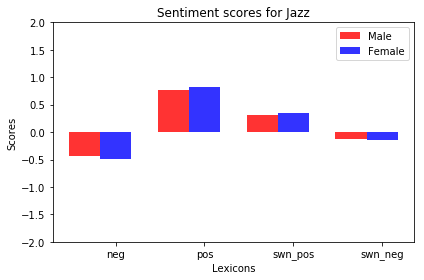

In [78]:
# data to plot
n_groups = 4
senti_means_male = combinedmale.loc[combined.index == 'Jazz'].values.tolist()[0]
senti_means_female = combinedfemale.loc[combined.index == 'Jazz'].values.tolist()[0]
# print(senti_means_male)
# create plot
fig, ax = plt.subplots()
index = np.arange(len(senti_means_male))
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, senti_means_male, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Male')
 
rects2 = plt.bar(index + bar_width, senti_means_female, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Female')
 
plt.xlabel('Lexicons')
plt.ylabel('Scores')
plt.title('Sentiment scores for Jazz')
plt.xticks(index + bar_width, ('neg','pos','swn_pos','swn_neg','plsntness','snstvty'))
plt.legend()
plt.ylim(top = 2,bottom = -2)
 
plt.tight_layout()
plt.show()